In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read in batter data for modeliing 
batter = pd.read_csv('../Modeling_Data/batter_data_modeling.csv')

In [3]:
batter.head()

Name Team POS    GMS     AB      R      H    2B   3B    HR  ...  \
0  Cody Bellinger  LAD  CF  212.0  771.0  154.0  221.0  44.0  3.0  59.0  ...   
1    Ronald Acuna  ATL  CF  156.0  626.0  127.0  175.0  22.0  2.0  41.0  ...   
2    Alex Bregman  HOU  3B  199.0  707.0  141.0  201.0  49.0  3.0  47.0  ...   
3  Anthony Rendon  WSH  3B  198.0  734.0  146.0  228.0  55.0  4.0  43.0  ...   
4   Rafael Devers  BOS  3B  213.0  879.0  161.0  262.0  70.0  5.0  43.0  ...   

      SO    SB   CS     PTS     TB     AVG     SLG     OBP     OPS       FPPG  
0  150.0  21.0  6.0  2854.3  448.0  0.2866  0.5811  0.3862  0.9673  13.463679  
1  188.0  37.0  9.0  2208.9  324.0  0.2796  0.5176  0.3575  0.8751  14.159615  
2  109.0   5.0  1.0  2603.2  397.0  0.2843  0.5615  0.4047  0.9662  13.081407  
3  117.0   5.0  1.0  2711.7  420.0  0.3106  0.5722  0.4061  0.9783  13.695455  
4  186.0   8.0  8.0  2733.2  471.0  0.2981  0.5358  0.3436  0.8794  12.831925  

[5 rows x 22 columns]

In [4]:
batter.drop(columns=['PTS'], inplace=True)

In [5]:
batter.head()

Name Team POS    GMS     AB      R      H    2B   3B    HR  ...  \
0  Cody Bellinger  LAD  CF  212.0  771.0  154.0  221.0  44.0  3.0  59.0  ...   
1    Ronald Acuna  ATL  CF  156.0  626.0  127.0  175.0  22.0  2.0  41.0  ...   
2    Alex Bregman  HOU  3B  199.0  707.0  141.0  201.0  49.0  3.0  47.0  ...   
3  Anthony Rendon  WSH  3B  198.0  734.0  146.0  228.0  55.0  4.0  43.0  ...   
4   Rafael Devers  BOS  3B  213.0  879.0  161.0  262.0  70.0  5.0  43.0  ...   

      BB     SO    SB   CS     TB     AVG     SLG     OBP     OPS       FPPG  
0  125.0  150.0  21.0  6.0  448.0  0.2866  0.5811  0.3862  0.9673  13.463679  
1   76.0  188.0  37.0  9.0  324.0  0.2796  0.5176  0.3575  0.8751  14.159615  
2  143.0  109.0   5.0  1.0  397.0  0.2843  0.5615  0.4047  0.9662  13.081407  
3  118.0  117.0   5.0  1.0  420.0  0.3106  0.5722  0.4061  0.9783  13.695455  
4   61.0  186.0   8.0  8.0  471.0  0.2981  0.5358  0.3436  0.8794  12.831925  

[5 rows x 21 columns]

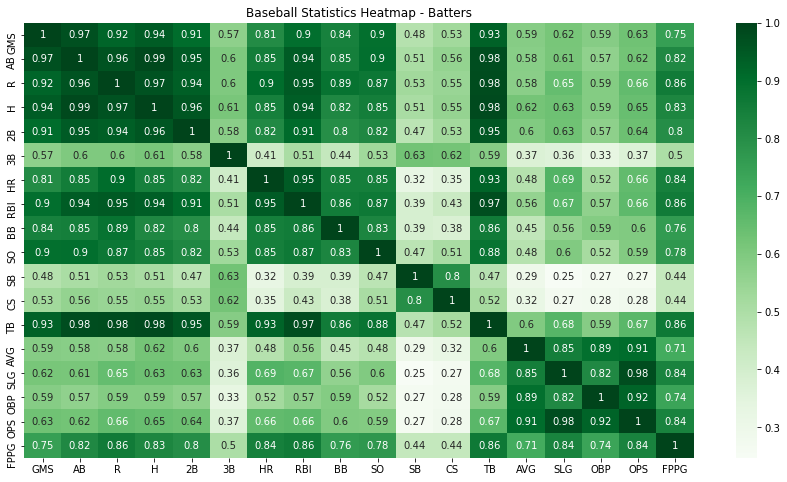

In [10]:
# plot heatmap of numerical values
plt.figure(figsize=(15, 8))
sns.heatmap(batter.corr(), annot=True, cmap='Greens')
plt.title('Baseball Statistics Heatmap - Batters')
plt.savefig('../Images/heatmap');

<AxesSubplot:xlabel='CS', ylabel='Count'>

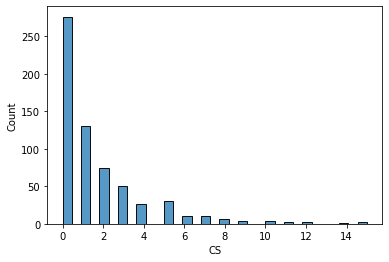

In [12]:
# histograms
sns.histplot(data=batter, x='a')

0    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

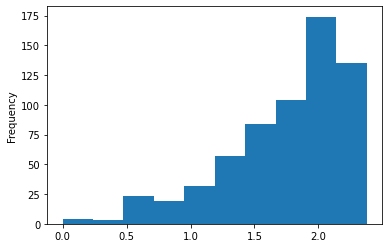

In [23]:
pd.Series((np.log10(batter['SO'] + 1).plot(kind='hist')))

In [15]:
batter['CS'].tail()

630    0.0
631    0.0
632    0.0
633    0.0
634    0.0
Name: CS, dtype: float64

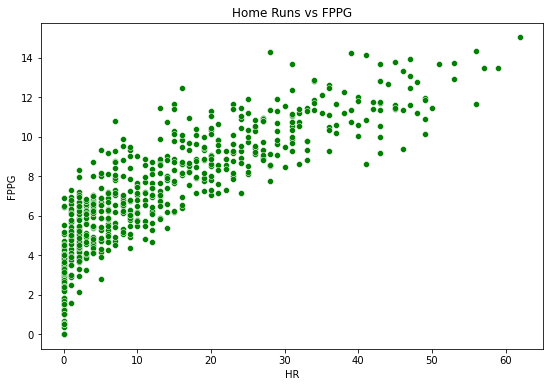

In [98]:
# plot home runs against fppg
plt.figure(figsize=(9,6))
sns.scatterplot(data=batter, y='FPPG', x='HR', color='Green')
plt.title('Home Runs vs FPPG')
plt.savefig('../Images/scatterplot');

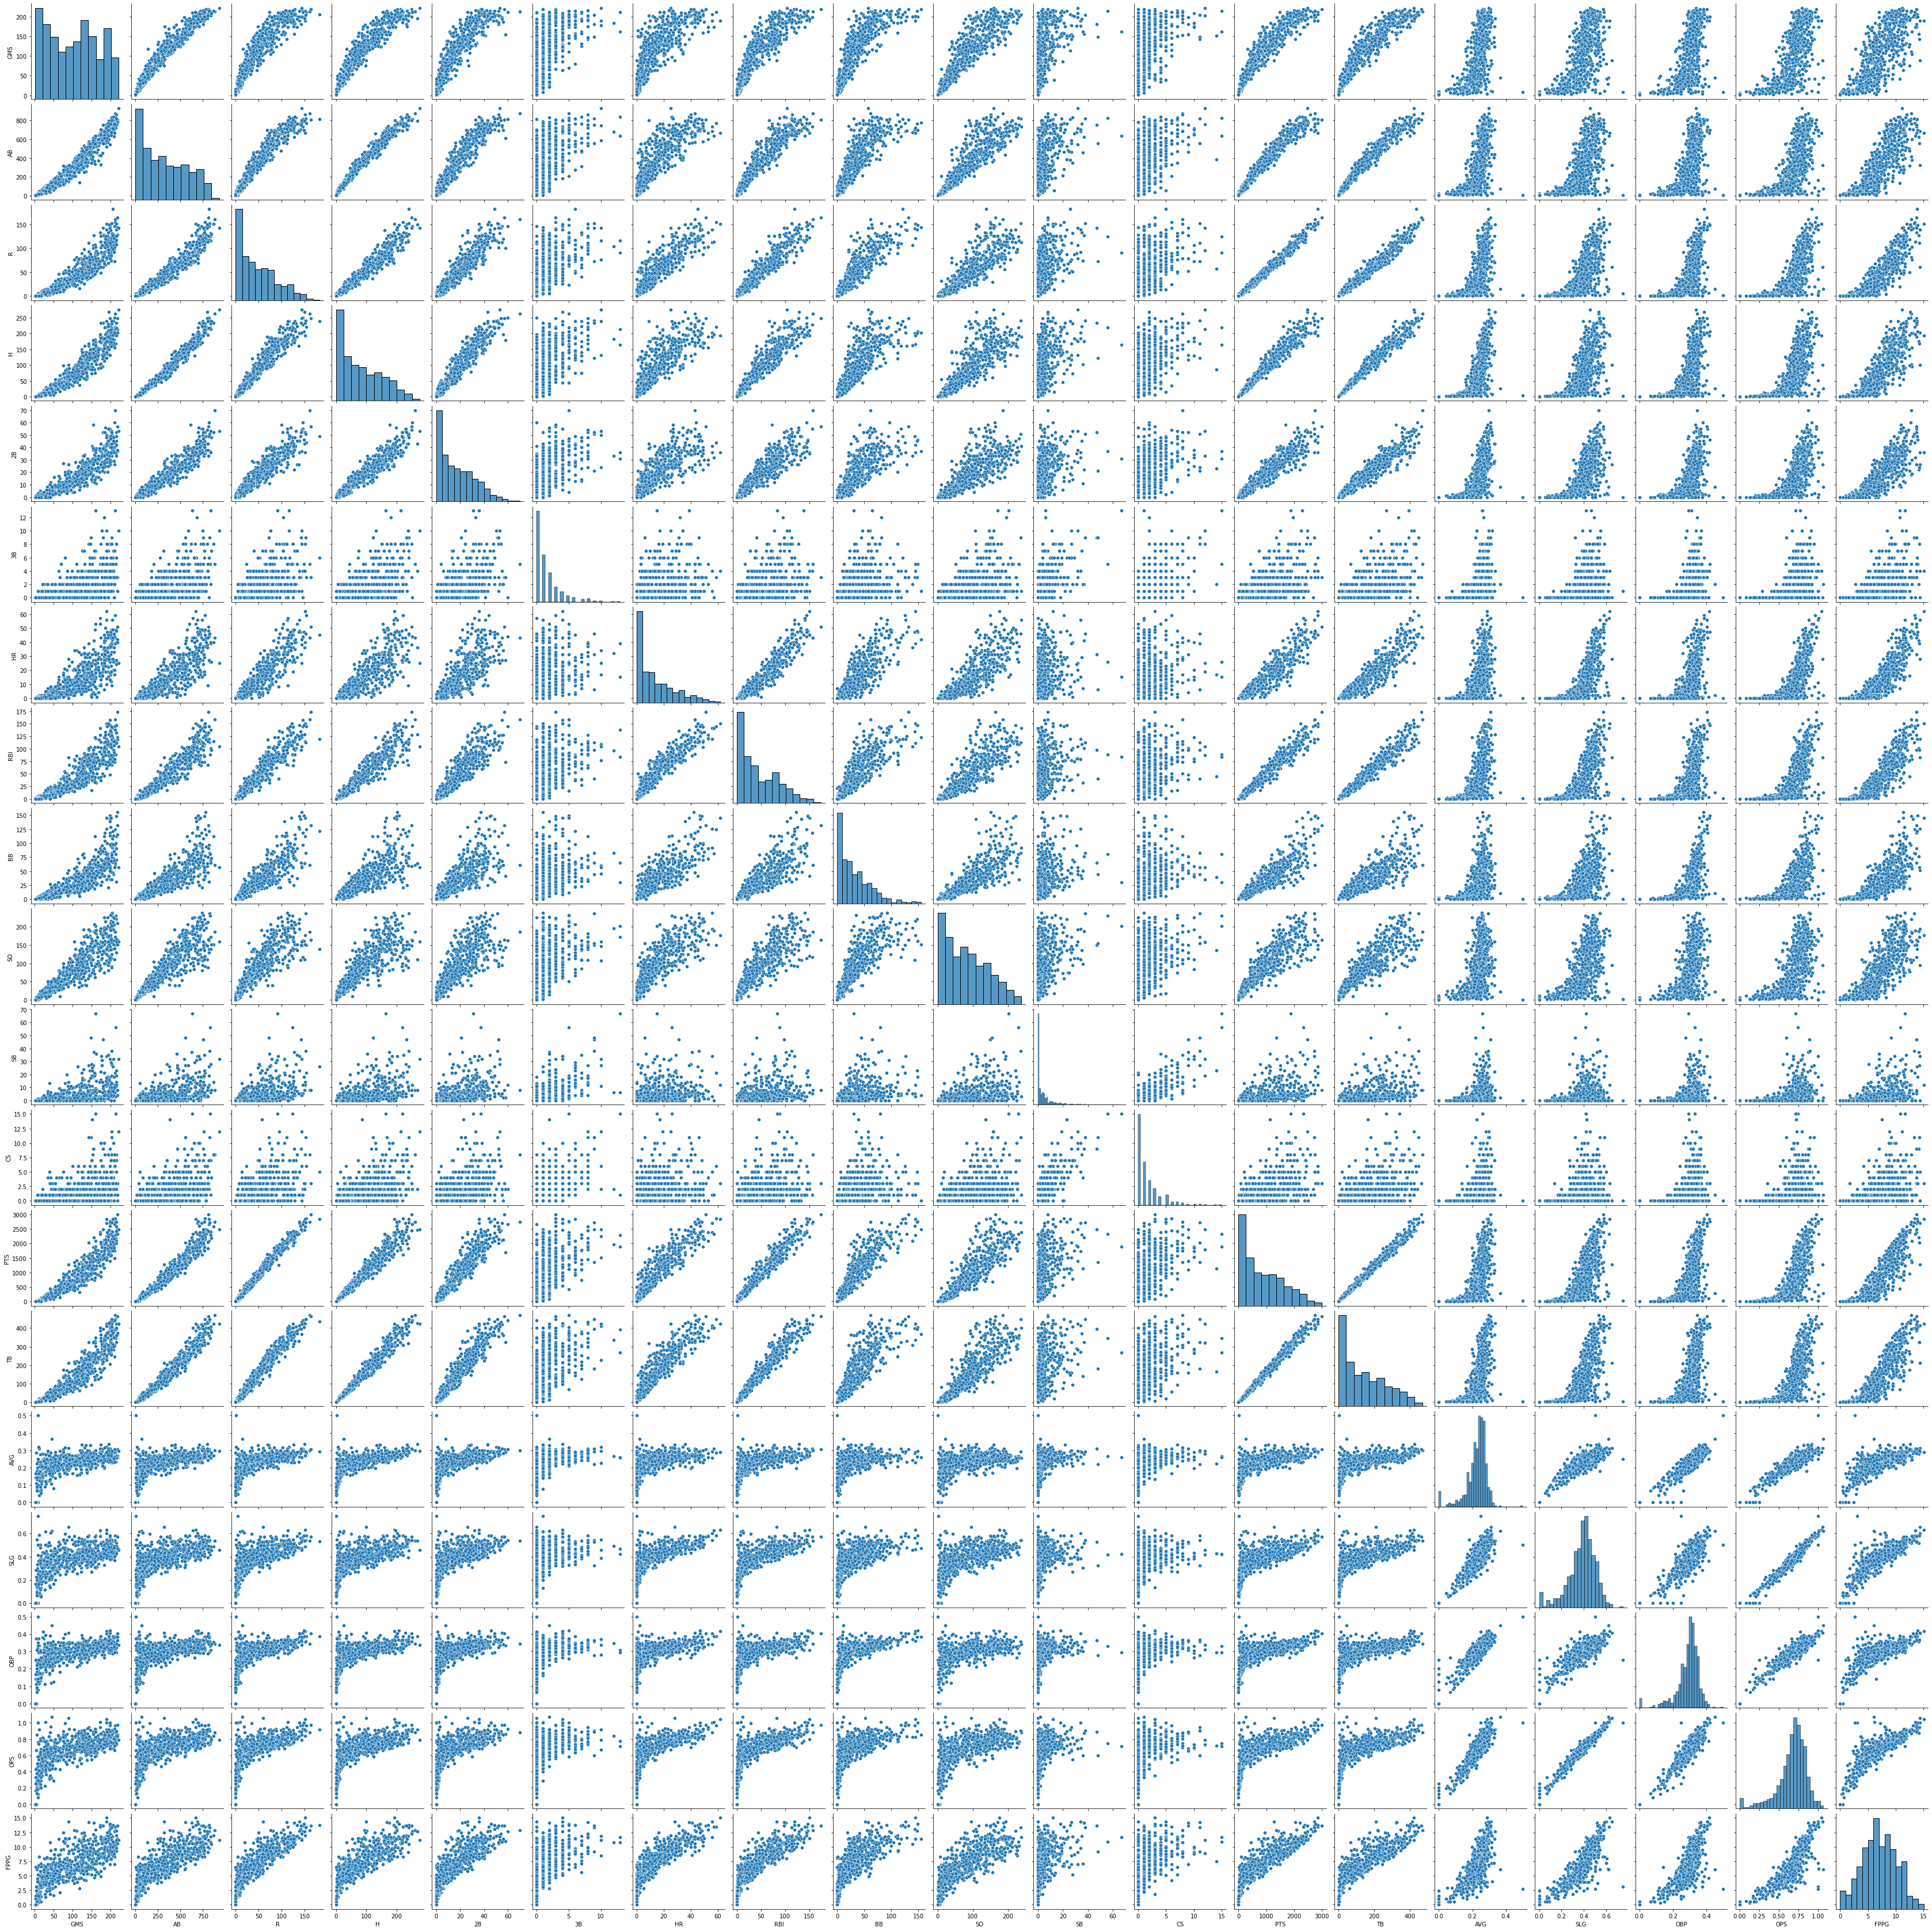

In [32]:
sns.pairplot(batter)

In [39]:
# scikit learn imports
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [44]:
# set X and y
# dropping object columns Name, Team and position as they are unneeded for the modeling process
# also dropping FPPG as it is going to be the y variable
X = batter.drop(columns=['Name', 'Team', 'POS', 'FPPG'])
y = batter['FPPG']

In [45]:
# Instaniate LinearRegression
linreg = LinearRegression()

In [47]:
# fit Linear Regression with X and y
linreg.fit(X, y)

LinearRegression()

In [77]:
# read in test data
test_df = pd.read_csv('../Modeling_Data/batter_test_data.csv')

In [78]:
# drop columns to match 
test_data = test_df.drop(columns=['Name', 'Team', 'Pos', 'FPPG', 'PTS'])

In [80]:
# make predicitons on the test data and add to test dataframe
test_df['Projected_FPPG'] = linreg.predict(test_data)

In [81]:
# RMSE
mean_squared_error(y_true=test_df['FPPG'], y_pred=test_df['Projected_FPPG'], squared=False)

2.412999183971186

In [83]:
# std
test_df['FPPG'].describe()

count    477.000000
mean       7.006965
std        3.961091
min        0.000000
25%        4.278571
50%        6.860000
75%        9.616667
max       40.900000
Name: FPPG, dtype: float64

In [86]:
# predict on training data
batter['Projected_FPPG'] = linreg.predict(X)

In [91]:
# RMSE training
mean_squared_error(y, linreg.predict(X), squared=False)

0.8091124260338662

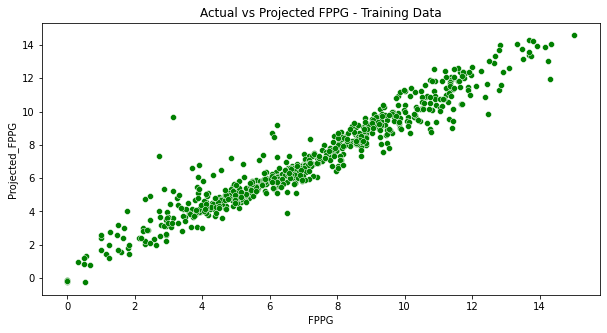

In [88]:
# plot prpjections against actuals
plt.figure(figsize=(10,5))
sns.scatterplot(x=batter['FPPG'], y=batter['Projected_FPPG'], color='green')
plt.title('Actual vs Projected FPPG - Training Data');

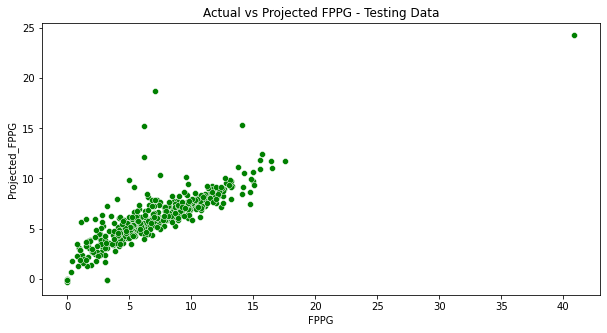

In [99]:
# plot prpjections against actuals
plt.figure(figsize=(10,5))
sns.scatterplot(x=test_df['FPPG'], y=test_df['Projected_FPPG'], color='green')
plt.title('Actual vs Projected FPPG - Testing Data')
plt.savefig('../Images/scatterplot_rmse');